# 4.09 Reading

## Table of Contents:
1. Import Libraries + Data
2. Bar Charts
3. Histograms + Scatterplots
4. Sampling Data

# 01. Import Libraries + Data

In [1]:
# Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# path
path = r'/Users/alliecarlisle/Desktop/CareerFoundry_Data_Analytics/Instacart Basket Analysis'

In [3]:
# orders_products_merged_2
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_aggregated.pkl'))

In [4]:
ords_prods_merge.shape

(30328763, 23)

In [5]:
ords_prods_merge.head(10)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,time_between_orders,product_id,add_to_cart_order,reordered,product_name,...,_merge,price_range_loc,busiest_days,busiest_time_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,both,Mid-range product,Slowest days,regularly busy time of day,10,New customer,6.372222,Low spender,20.5,Non-frequent customer
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,both,Mid-range product,Slowest days,busiest time of day,10,New customer,6.372222,Low spender,20.5,Non-frequent customer
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,both,Mid-range product,Slowest days,regularly busy time of day,10,New customer,6.372222,Low spender,20.5,Non-frequent customer
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,both,Mid-range product,Slowest days,busiest time of day,10,New customer,6.372222,Low spender,20.5,Non-frequent customer
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,both,Mid-range product,Regular days,regularly busy time of day,10,New customer,6.372222,Low spender,20.5,Non-frequent customer
5,550135,1,7,1,9,20.0,196,1,1,Soda,...,both,Mid-range product,Busiest days,busiest time of day,10,New customer,6.372222,Low spender,20.5,Non-frequent customer
6,3108588,1,8,1,14,14.0,196,2,1,Soda,...,both,Mid-range product,Busiest days,busiest time of day,10,New customer,6.372222,Low spender,20.5,Non-frequent customer
7,2295261,1,9,1,16,0.0,196,4,1,Soda,...,both,Mid-range product,Busiest days,busiest time of day,10,New customer,6.372222,Low spender,20.5,Non-frequent customer
8,2550362,1,10,4,8,30.0,196,1,1,Soda,...,both,Mid-range product,Slowest days,regularly busy time of day,10,New customer,6.372222,Low spender,20.5,Non-frequent customer
9,2968173,15,15,1,9,7.0,196,2,0,Soda,...,both,Mid-range product,Busiest days,busiest time of day,22,Regular customer,3.994118,Low spender,10.0,Frequent customer


# 02. Bar Charts

<Axes: >

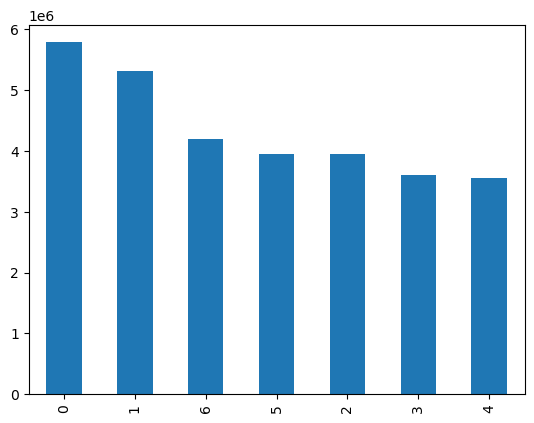

In [7]:
# orders day of the week frequency (largest to smallest)
ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar()

<Axes: >

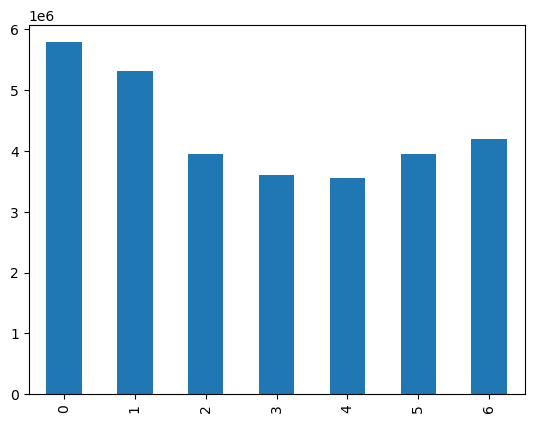

In [8]:
# orders day of the week frequency (sorted by index)
ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

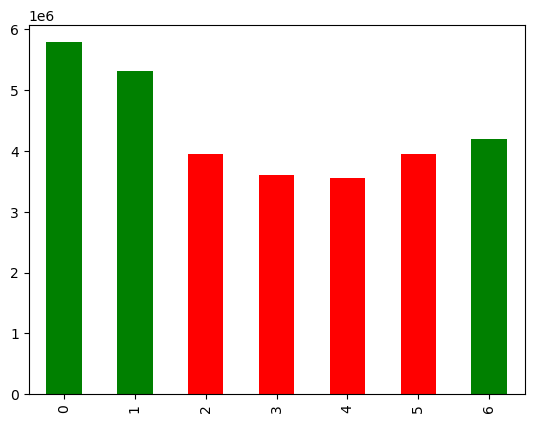

In [10]:
# orders day of the week frequency (sorted by index, with color, and saved with bar object)bar = 
bar = ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index().plot.bar(color = ['green', 'green', 'red', 'red', 'red', 'red', 'green', 'green'])

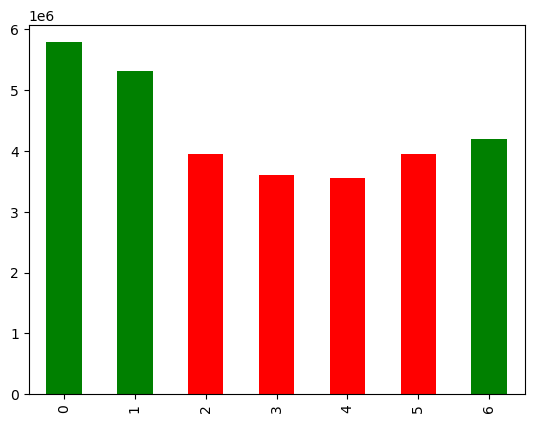

In [12]:
# access bar chart
bar.figure

In [13]:
# export bar chart as an image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 03. Histograms and Scatterplots

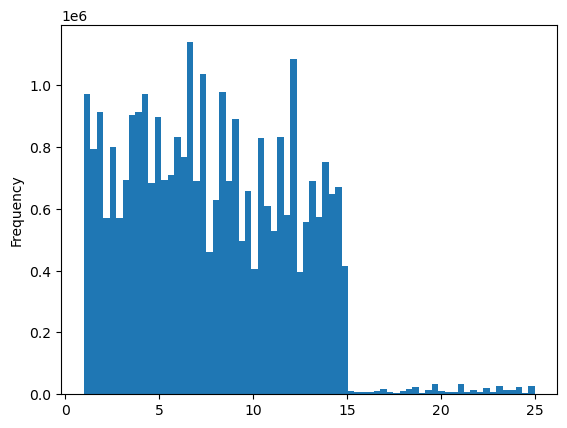

In [26]:
# histogram for prices column
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [28]:
# export to visualizations folder
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# 04. Sampling Data

In [29]:
# create a list holding true/false values to test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [30]:
dev

array([False,  True, False, ...,  True, False,  True])

In [31]:
np.random.rand(10)

array([0.38249654, 0.86075523, 0.52050071, 0.76980339, 0.95770057,
       0.65565091, 0.77542577, 0.2051172 , 0.66590939, 0.42935793])

In [32]:
# store 70% of the sample in big
big = ords_prods_merge[dev]

In [33]:
# store 30% of the sample in small
small = ords_prods_merge[~dev]

In [36]:
# check 
len(ords_prods_merge)

30328763

In [35]:
len(big) + len(small)

30328763

In [37]:
# speed up processing time
df_2 = small[['orders_day_of_the_week', 'prices']]

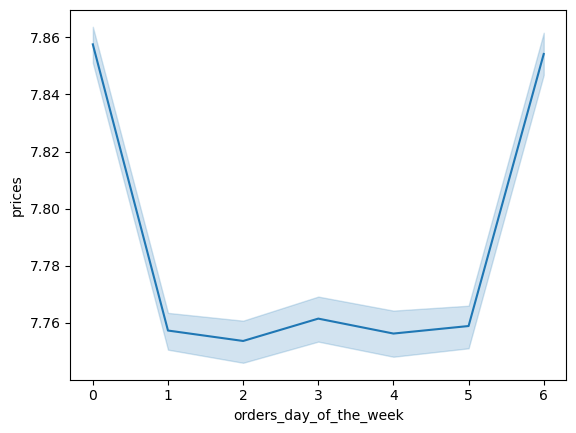

In [39]:
# create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week',y = 'prices')